In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("/Users/Qasir/Documents/Jorvan/Code/jupyter/mall_customer_segmentation/mall_customer_segmentation/assets/Mall_Customers.csv")

In [3]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df.iloc[:,1])

In [7]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
df['id'] = df[['Gender', 'Age', 'Income', 'Score']].sum(axis=1).map(hash)
df = df.drop(['CustomerID'], axis=1) 
df = df[['id', 'Gender', 'Age', 'Income', 'Score']]

KeyError: "['CustomerID'] not found in axis"

In [12]:
df.head()

,id,Gender,Age,Income,Score
0,74,1,19,15,39
1,118,1,21,15,81
2,42,0,20,16,6
3,116,0,23,16,77
4,88,0,31,17,40


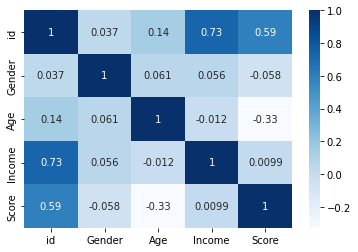

In [13]:
c = df.corr()
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

It is clear from this correlation table that older customers have less income and therefore spend less money.

In [14]:
df.describe()

,id,Gender,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,150.050000,0.440000,38.850000,60.560000,50.200000
std,36.347672,0.497633,13.969007,26.264721,25.823522
min,42.000000,0.000000,18.000000,15.000000,1.000000
25%,127.000000,0.000000,28.750000,41.500000,34.750000
50%,145.000000,0.000000,36.000000,61.500000,50.000000
75%,174.250000,1.000000,49.000000,78.000000,73.000000
max,251.000000,1.000000,70.000000,137.000000,99.000000


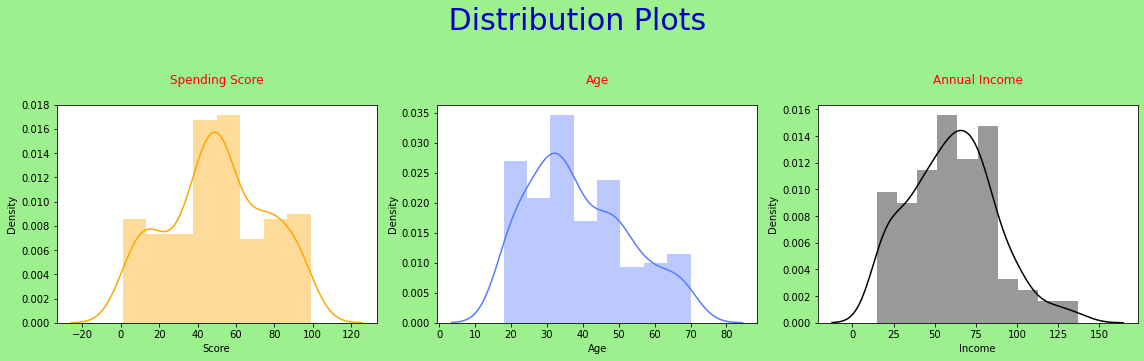

In [15]:
# -Distribution Plots-

plt.figure(figsize=(16,12),facecolor='#9DF08E')

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='#FF000B')
sns.distplot(df['Score'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='#FF000B')
sns.distplot(df['Age'], color='#577AFF')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='#FF000B')
sns.distplot(df['Income'], color='black')

plt.suptitle(' Distribution Plots\n', color='#0000C1', size = 30)
plt.tight_layout()

The distributions are generally similar to the normal distribution, with only a few standard deviations. The 'more normal' distribution among the distributions is the 'Spending Score'. That's good because it's our target column.

In [11]:
# Let's calculate how much to shop for which gender

spending_score_male = 0
spending_score_female = 0

for i in range(len(df)):
    if df['Gender'][i] == 1:
        spending_score_male = spending_score_male + df['Score'][i]
    if df['Gender'][i] == 0:
        spending_score_female = spending_score_female + df['Score'][i]


print('\033[1m' + '\033[93m' + f'Males Spending Score  : {spending_score_male}')
print('\033[1m' + '\033[93m' + f'Females Spending Score: {spending_score_female}')

Males Spending Score  : 4269
Females Spending Score: 5771


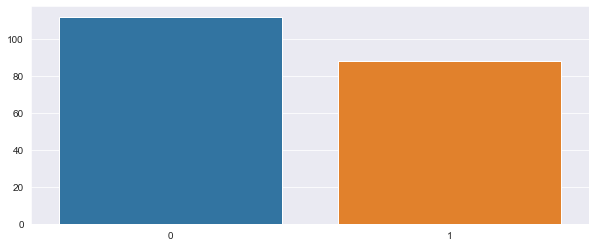

In [16]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Text(0.5, 1.0, 'Age - Spending Score')

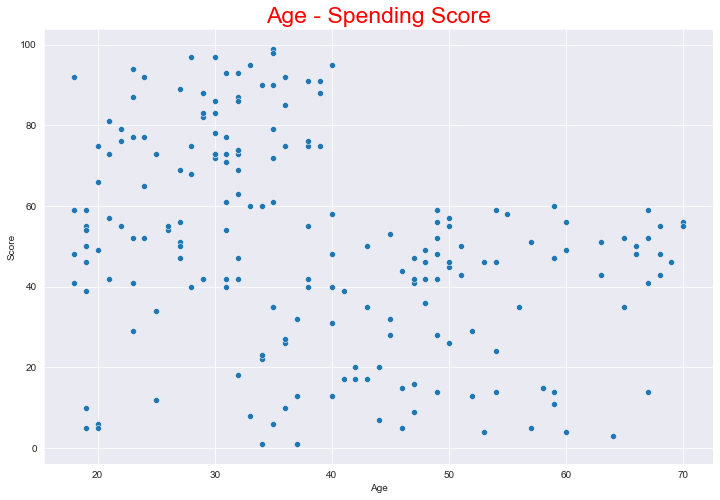

In [17]:
# Let's look at the relationship between Age and Spending score

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Age'], y = df['Score'])
plt.title('Age - Spending Score', size = 23, color='red')

Text(0.5, 1.0, 'Annual Income - Spending Score')

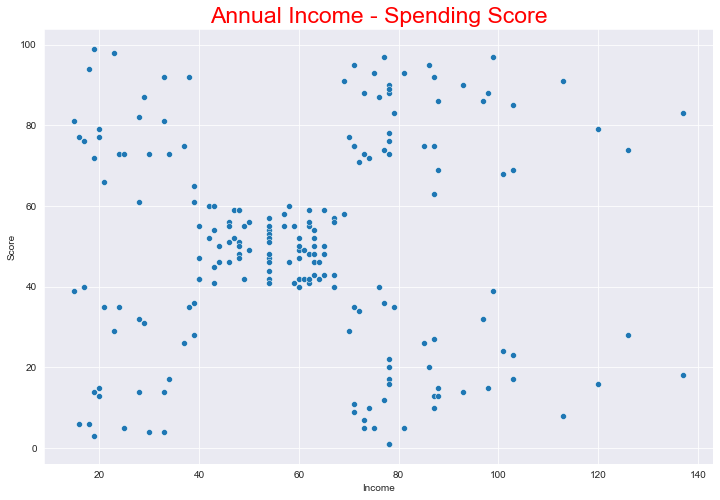

In [18]:
# Let's look at the relationship between Annual Income and Spending Score

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Income'], y = df['Score'], palette = "red")
plt.title('Annual Income - Spending Score', size = 23, color='red')

One of the two regions shown can be selected as the target audience. Even though the number of people whose annual income is between (40-60)k$ is higher (we understand this from the number of data points), the number of that audience is higher but the spending score is low, so if we make shopping attractive for them by choosing the target audience from the two regions above, we will see more profit can be made.

In [19]:
df.head(5)

,id,Gender,Age,Income,Score
0,74,1,19,15,39
1,118,1,21,15,81
2,42,0,20,16,6
3,116,0,23,16,77
4,88,0,31,17,40


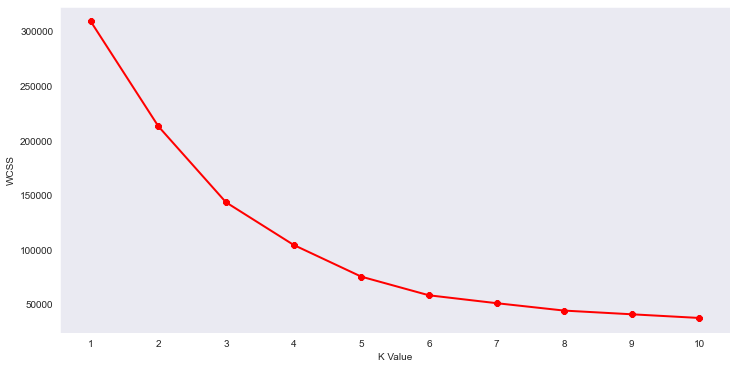

In [21]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [22]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [23]:
# Iteration to do clustering with 1-11 cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

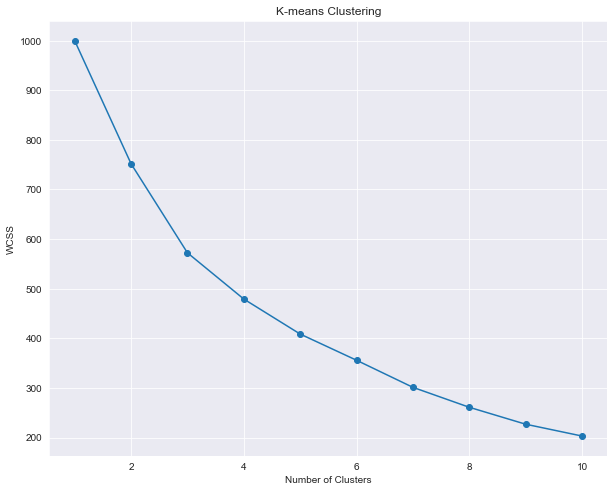

In [24]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans.fit(segmentation_std)

KMeans(n_clusters=5)

In [26]:
#the prediction of which cluster a data belongs to can be extracted from labels_
kmeans.labels_

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2,
       4, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 2,
       1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 0, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3, 0, 3, 0, 3, 1, 3, 0, 3, 1, 3,
       1, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 1, 3,
       0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3], dtype=int32)

In [27]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment'] = kmeans.labels_

In [28]:
df_segm_kmeans

,id,Gender,Age,Income,Score,Segment
0,74,1,19,15,39,2
1,118,1,21,15,81,2
2,42,0,20,16,6,4
3,116,0,23,16,77,2
4,88,0,31,17,40,4
...,...,...,...,...,...,...
195,234,0,35,120,79,3
196,199,0,45,126,28,1
197,233,1,32,126,74,3
198,188,1,32,137,18,0


In [29]:
##calculate the mean value of each features by cluster
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()
df_segm_analysis

,id,Gender,Age,Income,Score
Segment,,,,,
0,150.523810,1.000000,48.642857,68.619048,32.261905
1,155.333333,0.000000,47.833333,67.541667,39.958333
2,128.666667,0.411765,24.470588,41.176471,62.607843
3,201.820513,0.461538,32.692308,86.538462,82.128205
4,89.950000,0.350000,45.400000,25.650000,18.550000
